<a href="https://colab.research.google.com/github/mehdimerbah/CompDrugDiscovery/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Package and Data Import

In [2]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
!mamba install -c conda-forge rdkit

In [8]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
bioactivity_DF = pd.read_csv('https://raw.githubusercontent.com/mehdimerbah/CompDrugDiscovery/main/data/preprocessed_bioactivity_data.csv')
bioactivity_DF.head()

,molecule_chembl_id,canonical_smiles,standard_value,activity_class
0,CHEMBL372889,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C(N)=O)ccc21,25.0,active
1,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,moderate
2,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,moderate
3,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
4,CHEMBL188484,O=C1C(=O)N(Cc2cc3ccccc3o2)c2ccc(I)cc21,13.0,active


## Calculating Descriptors

### Defining a Lipinski Descriptors Function

In [4]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors


In [5]:
lipinski_data = lipinski(bioactivity_DF.canonical_smiles)
lipinski_data.head()

,MW,LogP,NumHDonors,NumHAcceptors
0,299.286,1.11984,1.0,5.0
1,281.271,1.89262,0.0,5.0
2,415.589,3.81320,0.0,2.0
3,421.190,2.66050,0.0,4.0
4,403.175,3.76690,0.0,3.0


In [69]:
final_DF = pd.concat([bioactivity_DF, lipinski_data], axis = 1)
final_DF.shape
final_DF.head()

,molecule_chembl_id,canonical_smiles,standard_value,activity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL372889,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C(N)=O)ccc21,25.0,active,299.286,1.11984,1.0,5.0
1,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,moderate,281.271,1.89262,0.0,5.0
2,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,moderate,415.589,3.81320,0.0,2.0
3,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.190,2.66050,0.0,4.0
4,CHEMBL188484,O=C1C(=O)N(Cc2cc3ccccc3o2)c2ccc(I)cc21,13.0,active,403.175,3.76690,0.0,3.0


### Logarithmic Normalization

In [50]:
#sns.displot(bioactivity_DF.standard_value)
bioactivity_DF.standard_value.describe()

count    2.870000e+02
mean     3.715624e+12
std      2.307431e+13
min      2.200000e-03
25%      2.500000e+01
50%      9.000000e+02
75%      2.500000e+04
max      3.311311e+14
Name: standard_value, dtype: float64

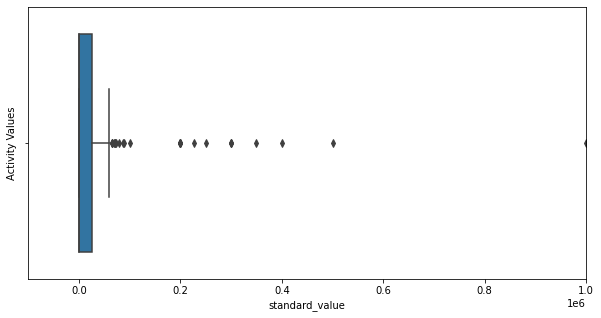

In [51]:
plt.figure(figsize=(10,5))
plt.xlim(-100000,1000000)
plt.ylabel('Activity Values')
sns.boxplot(x=bioactivity_DF.standard_value)
plt.show()

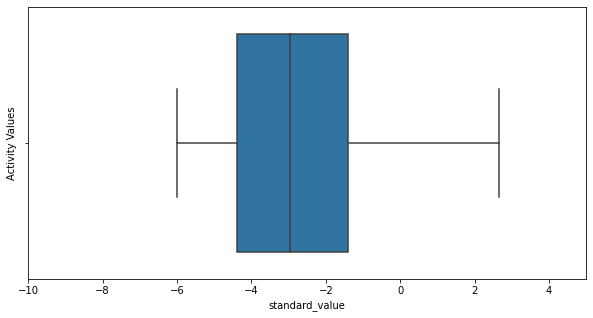

In [52]:
plt.figure(figsize=(10,5))
plt.xlim(-10,5)
plt.ylabel('Activity Values')
sns.boxplot(x=-np.log10(bioactivity_DF.standard_value))
plt.show()

In [70]:
## First let's cap the values 
norm = []
for i in final_DF['standard_value']:
  if i > 100000000:
    i = 100000000
  norm.append(i)

final_DF['pIC50'] = norm
final_DF = final_DF.drop('standard_value', 1)
final_DF.shape
final_DF.head(5)
        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


,molecule_chembl_id,canonical_smiles,activity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL372889,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C(N)=O)ccc21,active,299.286,1.11984,1.0,5.0,25.0
1,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,moderate,281.271,1.89262,0.0,5.0,7200.0
2,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,moderate,415.589,3.81320,0.0,2.0,9400.0
3,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,13500.0
4,CHEMBL188484,O=C1C(=O)N(Cc2cc3ccccc3o2)c2ccc(I)cc21,active,403.175,3.76690,0.0,3.0,13.0


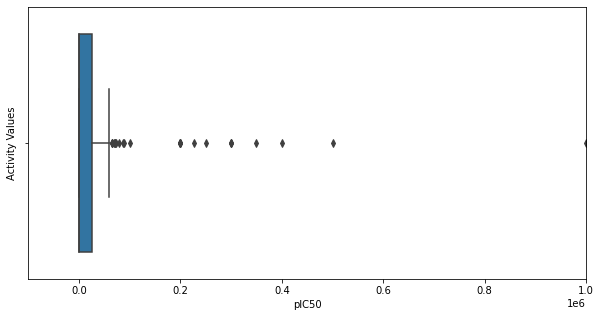

In [72]:
# Let's look at the data distribution again
plt.figure(figsize=(10,5))
plt.xlim(-100000,1000000)
plt.ylabel('Activity Values')
sns.boxplot(x=final_DF.pIC50)
plt.show()

In [74]:
# Now we can normalize the values
test = final_DF
test['pIC50'] = test['pIC50']*(10**-9)

In [75]:
test.head(10)

,molecule_chembl_id,canonical_smiles,activity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL372889,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C(N)=O)ccc21,active,299.286,1.11984,1.0,5.0,2.500000e-08
1,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,moderate,281.271,1.89262,0.0,5.0,7.200000e-06
2,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,moderate,415.589,3.81320,0.0,2.0,9.400000e-06
3,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,1.350000e-05
4,CHEMBL188484,O=C1C(=O)N(Cc2cc3ccccc3o2)c2ccc(I)cc21,active,403.175,3.76690,0.0,3.0,1.300000e-08
5,CHEMBL362781,COc1ccc2c(c1)C(=O)C(=O)N2Cc1cc2ccccc2o1,active,307.305,3.17090,0.0,4.0,1.300000e-08
6,CHEMBL191322,O=C1C(=O)N(Cc2cc3ccccc3o2)c2ccc([N+](=O)[O-])cc21,active,322.276,3.07050,0.0,5.0,2.400000e-08
7,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,1.311000e-05
8,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],moderate,338.344,3.53900,0.0,5.0,2.000000e-06
9,CHEMBL363243,Nc1cccc2c1N(Cc1cc3ccccc3s1)C(=O)C2=O,active,308.362,3.21300,1.0,4.0,3.100000e-08


In [76]:
test['pIC50'] = -np.log10(test['pIC50'])
test.head(10)

,molecule_chembl_id,canonical_smiles,activity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL372889,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C(N)=O)ccc21,active,299.286,1.11984,1.0,5.0,7.602060
1,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,moderate,281.271,1.89262,0.0,5.0,5.142668
2,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,moderate,415.589,3.81320,0.0,2.0,5.026872
3,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
4,CHEMBL188484,O=C1C(=O)N(Cc2cc3ccccc3o2)c2ccc(I)cc21,active,403.175,3.76690,0.0,3.0,7.886057
5,CHEMBL362781,COc1ccc2c(c1)C(=O)C(=O)N2Cc1cc2ccccc2o1,active,307.305,3.17090,0.0,4.0,7.886057
6,CHEMBL191322,O=C1C(=O)N(Cc2cc3ccccc3o2)c2ccc([N+](=O)[O-])cc21,active,322.276,3.07050,0.0,5.0,7.619789
7,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
8,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],moderate,338.344,3.53900,0.0,5.0,5.698970
9,CHEMBL363243,Nc1cccc2c1N(Cc1cc3ccccc3s1)C(=O)C2=O,active,308.362,3.21300,1.0,4.0,7.508638


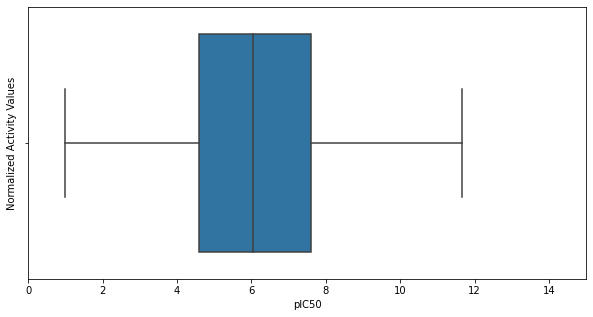

In [80]:
plt.figure(figsize=(10,5))
plt.xlim(0,15)
plt.ylabel('Normalized Activity Values')
sns.boxplot(x = test.pIC50)
plt.show()